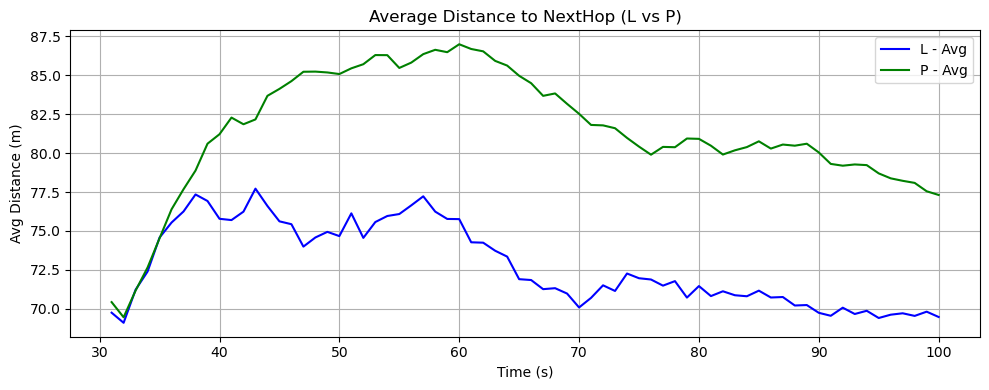

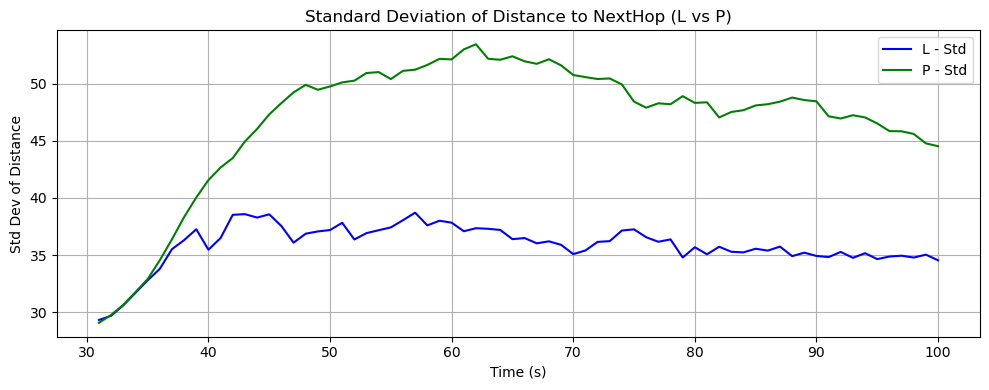

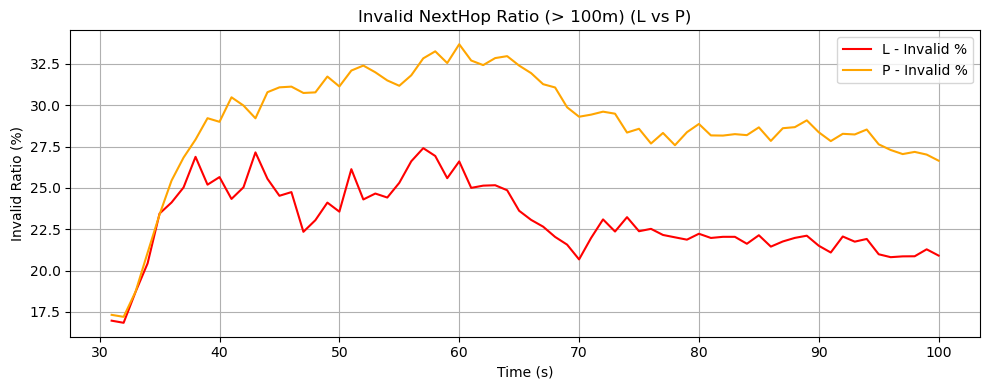

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt

base_path = "/Users/whdgus1323/Documents/experimental data/2025_07_01_AppSci_AODV_V09"
density = "D400"
speed = "S30"
node = "N0"
methods = ["L", "P"]
max_tx_dist = 100.0

per_method_result = {}

for method in methods:
    pos_path = os.path.join(base_path, method, density, speed, node, "position.csv")
    if not os.path.exists(pos_path):
        print(f"[{method}] 위치 파일 없음: {pos_path}")
        continue

    df_all = pd.read_csv(pos_path)
    times = sorted(df_all["Time"].unique())
    avg_distances, std_distances, invalid_ratios = [], [], []

    for t in times:
        df_t = df_all[df_all["Time"] == t]
        if df_t.empty:
            avg_distances.append(0)
            std_distances.append(0)
            invalid_ratios.append(0)
            continue

        dists = []
        invalid, total = 0, 0

        for _, row in df_t.iterrows():
            dist = sqrt((row["NodeX"] - row["NextHopX"])**2 + (row["NodeY"] - row["NextHopY"])**2)
            dists.append(dist)
            total += 1
            if dist > max_tx_dist:
                invalid += 1

        avg = sum(dists) / len(dists) if dists else 0
        std = pd.Series(dists).std() if dists else 0
        ratio = (invalid / total) * 100.0 if total > 0 else 0.0

        avg_distances.append(avg)
        std_distances.append(std)
        invalid_ratios.append(ratio)

    per_method_result[method] = {
        "times": times,
        "avg": avg_distances,
        "std": std_distances,
        "invalid": invalid_ratios
    }

times = per_method_result["L"]["times"]
plt.figure(figsize=(10, 4))
plt.plot(times, per_method_result["L"]["avg"], label="L - Avg", color='blue')
plt.plot(times, per_method_result["P"]["avg"], label="P - Avg", color='green')
plt.xlabel("Time (s)")
plt.ylabel("Avg Distance (m)")
plt.title("Average Distance to NextHop (L vs P)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(times, per_method_result["L"]["std"], label="L - Std", color='blue')
plt.plot(times, per_method_result["P"]["std"], label="P - Std", color='green')
plt.xlabel("Time (s)")
plt.ylabel("Std Dev of Distance")
plt.title("Standard Deviation of Distance to NextHop (L vs P)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(times, per_method_result["L"]["invalid"], label="L - Invalid %", color='red')
plt.plot(times, per_method_result["P"]["invalid"], label="P - Invalid %", color='orange')
plt.xlabel("Time (s)")
plt.ylabel("Invalid Ratio (%)")
plt.title("Invalid NextHop Ratio (> 100m) (L vs P)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
